In [51]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['figure.figsize'] = [8,6]

In [52]:
#First we define as few variables
N = 20 #resolution
n_cut = 10
delta = 2*np.pi/N #Spacing between points

def normalize(wavefunction):
    normalized_wavefunction = 1/np.sqrt(delta * (wavefunction.T)@(np.conj(wavefunction))) * wavefunction
    return normalized_wavefunction

def nMinusng(dim, ng): #Generate the matrix that corresponds to the (n-ng)**2 term
    offDiagArr = np.ones(dim-1)
    DiagArr = np.ones(dim)
    nMatrix = -(np.diag(offDiagArr, k = 1) + np.diag(-offDiagArr, k = -1))*1j/(2*delta)
    n2Matrix = -(np.diag(-2*DiagArr) + np.diag(offDiagArr, k = 1) + np.diag(offDiagArr, k = -1))/(delta**2)
    ng2Matrix = np.diag(ng*ng*DiagArr)


    return n2Matrix - 2*ng*nMatrix + ng2Matrix

In [53]:
phi = np.linspace(-np.pi, np.pi, N)

diagArr = np.ones(N)
offDiagArr = np.ones(N-1)

def hamiltonian_gatemon(E_C, E_J, T, ng):
    E_kin = 4*E_C*nMinusng(N, ng)
    E_pot = -E_J*np.sqrt(1-T*np.sin(phi/2)**2)
    E_pot_matrix = np.diag(E_pot)
    return E_kin + E_pot_matrix, E_pot

def hamiltonian_transmon(E_C, E_J, ng):
    E_kin = 4*E_C*nMinusng(N, ng)
    E_pot = -E_J*np.cos(phi)
    E_pot_matrix = np.diag(E_pot)
    return E_kin + E_pot_matrix, E_pot

[[ 0.+0.j         -0.-6.36619772j  0.+0.j          0.+0.j        ]
 [ 0.+6.36619772j  0.+0.j         -0.-6.36619772j  0.+0.j        ]
 [ 0.+0.j          0.+6.36619772j  0.+0.j         -0.-6.36619772j]
 [ 0.+0.j          0.+0.j          0.+6.36619772j  0.+0.j        ]]
[[ 324.22778766 -162.11389383   -0.           -0.        ]
 [-162.11389383  324.22778766 -162.11389383   -0.        ]
 [  -0.         -162.11389383  324.22778766 -162.11389383]
 [  -0.           -0.         -162.11389383  324.22778766]]
[[6.25 0.   0.   0.  ]
 [0.   6.25 0.   0.  ]
 [0.   0.   6.25 0.  ]
 [0.   0.   0.   6.25]]
-0.22166744159688115
0.8002038532998772
1.887786020846217
3.2701934409065054
5.0401083251801015
7.204581388917933


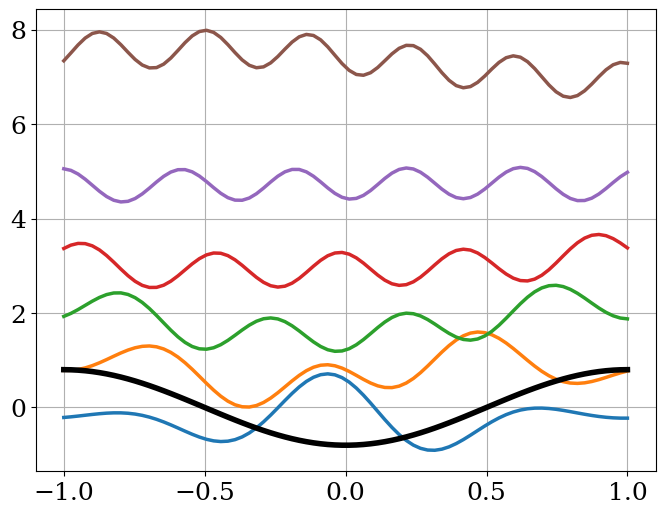

In [54]:
ham, potential = hamiltonian_transmon(0.2, 0.8, ng = 2.5)


eigenvalues, eigenvectors = sc.sparse.linalg.eigsh(ham, k=7, which = "SA") #Solve the Hamiltonian


#We can then plot our potential and our wavefunctions
for i in range(0, 6):
    plt.plot(phi/np.pi, -normalize(eigenvectors.real[:,i]) + eigenvalues.real[i], linewidth = 2.5)
    print(eigenvalues.real[i])

plt.plot(phi/np.pi, potential, linewidth = 4, color="black")


[[ 0.+0.j         -0.-6.36619772j  0.+0.j          0.+0.j        ]
 [ 0.+6.36619772j  0.+0.j         -0.-6.36619772j  0.+0.j        ]
 [ 0.+0.j          0.+6.36619772j  0.+0.j         -0.-6.36619772j]
 [ 0.+0.j          0.+0.j          0.+6.36619772j  0.+0.j        ]]
[[ 324.22778766 -162.11389383   -0.           -0.        ]
 [-162.11389383  324.22778766 -162.11389383   -0.        ]
 [  -0.         -162.11389383  324.22778766 -162.11389383]
 [  -0.           -0.         -162.11389383  324.22778766]]
[[100.   0.   0.   0.]
 [  0. 100.   0.   0.]
 [  0.   0. 100.   0.]
 [  0.   0.   0. 100.]]
1.733932700047995
5.885908606423359
9.736134544967467
13.24645124065318
16.39867293233888
19.304087088535567


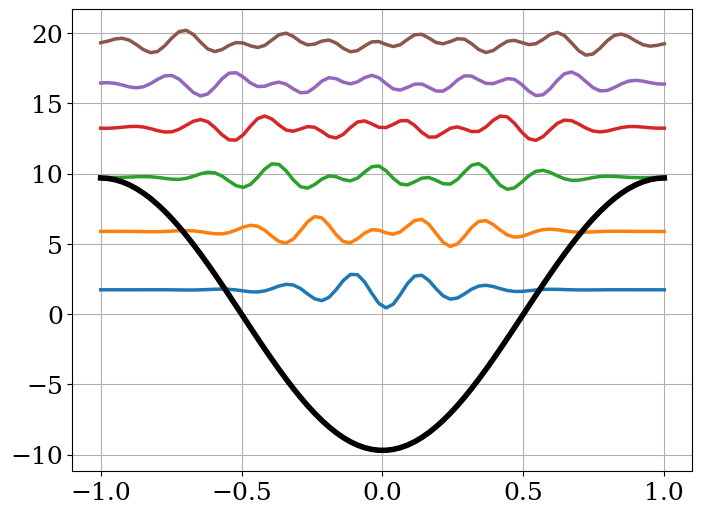

In [59]:
ham, potential = hamiltonian_transmon(0.194, 9.69, ng = -10)


eigenvalues, eigenvectors = sc.sparse.linalg.eigsh(ham, k=7, which = "SA") 


#We can then plot our potential and our wavefunctions
for i in range(0, 6):
    plt.plot(phi/np.pi, normalize(eigenvectors.real[:,i]) + eigenvalues.real[i], linewidth = 2.5)
    print(eigenvalues[i])

plt.plot(phi/np.pi, potential, linewidth = 4, color="black")


In [56]:
ngArr = np.linspace(-6, 6, 150)
E0 = np.zeros_like(ngArr)
E1 = np.zeros_like(ngArr)
E2 = np.zeros_like(ngArr)

ham, potential = hamiltonian_transmon(1, 1, ng = 0.5)

eigenvalues, eigenvectors = sc.sparse.linalg.eigsh(ham, k=3, which = "SA") 

energy_scale = eigenvalues[1]-eigenvalues[0] #The normalisation to recreate the plots from Koch

for i in range(len(ngArr)):
    ham, potential = hamiltonian_transmon(0.2, 1, ng = ngArr[i])

    eigenvalues, eigenvectors = sc.sparse.linalg.eigsh(ham, k=3, which = "SA") 

    E0[i] = eigenvalues[0]
    E1[i] = eigenvalues[1]
    E2[i] = eigenvalues[2]

print(energy_scale)


[[ 0.+0.j         -0.-6.36619772j  0.+0.j          0.+0.j        ]
 [ 0.+6.36619772j  0.+0.j         -0.-6.36619772j  0.+0.j        ]
 [ 0.+0.j          0.+6.36619772j  0.+0.j         -0.-6.36619772j]
 [ 0.+0.j          0.+0.j          0.+6.36619772j  0.+0.j        ]]
[[ 324.22778766 -162.11389383   -0.           -0.        ]
 [-162.11389383  324.22778766 -162.11389383   -0.        ]
 [  -0.         -162.11389383  324.22778766 -162.11389383]
 [  -0.           -0.         -162.11389383  324.22778766]]
[[0.25 0.   0.   0.  ]
 [0.   0.25 0.   0.  ]
 [0.   0.   0.25 0.  ]
 [0.   0.   0.   0.25]]
[[ 0.+0.j         -0.-6.36619772j  0.+0.j          0.+0.j        ]
 [ 0.+6.36619772j  0.+0.j         -0.-6.36619772j  0.+0.j        ]
 [ 0.+0.j          0.+6.36619772j  0.+0.j         -0.-6.36619772j]
 [ 0.+0.j          0.+0.j          0.+6.36619772j  0.+0.j        ]]
[[ 324.22778766 -162.11389383   -0.           -0.        ]
 [-162.11389383  324.22778766 -162.11389383   -0.        ]
 [  -0.       

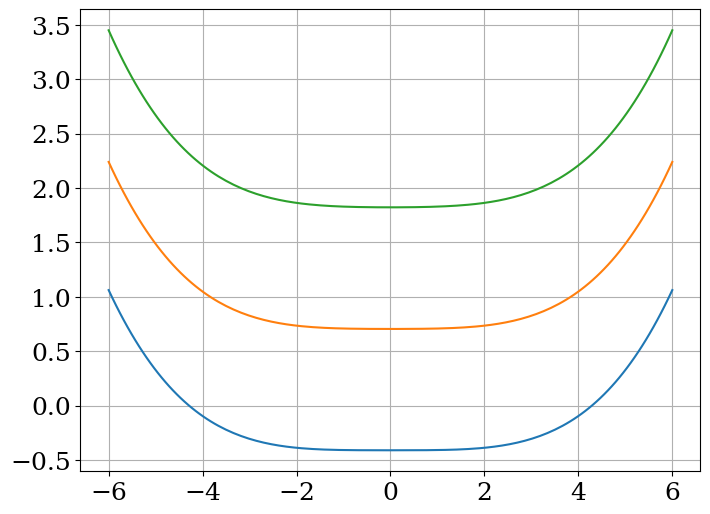

In [57]:
plt.plot(ngArr, E0)
plt.plot(ngArr, E1)
plt.plot(ngArr, E2)